<a href="https://colab.research.google.com/github/IDI-RASIDI/1320123009-data-mining/blob/main/Tugas_3_Preprocessing_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Eksplorasi Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Info dataset
df.info()

# Missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load ulang dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 1. Imputasi Age dengan median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# 2. Imputasi Embarked dengan modus
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()

# 3. Hapus kolom Cabin karena terlalu banyak missing values
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# Cek missing values setelah imputasi
print("\nMissing values setelah imputasi:")
print(df.isnull().sum())


Missing values setelah imputasi:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 2. Handling Missing Values

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load ulang dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 1. Imputasi Age dengan median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# 2. Imputasi Embarked dengan modus
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()

# 3. Hapus kolom Cabin karena terlalu banyak missing values
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# Cek missing values setelah imputasi
print("\nMissing values setelah imputasi:")
print(df.isnull().sum())


Missing values setelah imputasi:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 3. Encoding categorical variables

Batas bawah Fare: -26.724
Batas atas Fare : 65.6344


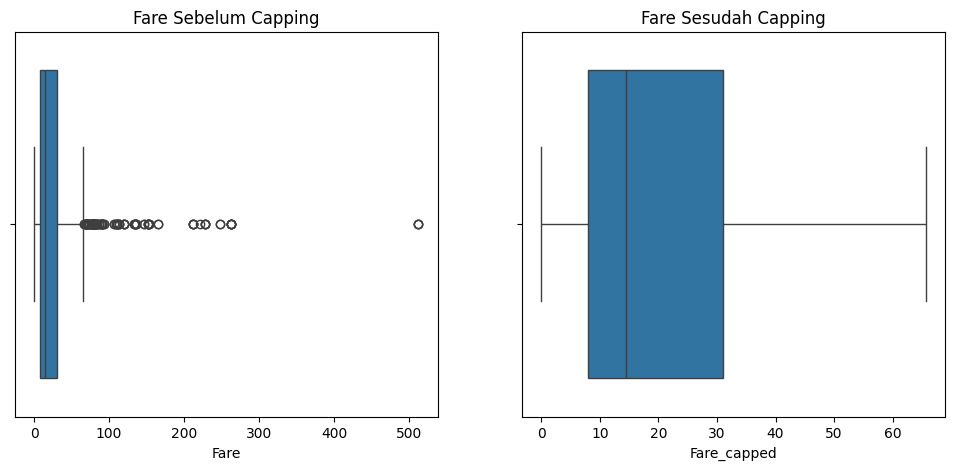

In [25]:
# -------- OUTLIER FARE ----------
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

df['Fare_capped'] = np.where(df['Fare'] > upper_limit, upper_limit,
                      np.where(df['Fare'] < lower_limit, lower_limit, df['Fare']))

print("Batas bawah Fare:", lower_limit)
print("Batas atas Fare :", upper_limit)

# Visualisasi sebelum & sesudah
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Fare'])
plt.title("Fare Sebelum Capping")

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare_capped'])
plt.title("Fare Sesudah Capping")
plt.show()

## 4. Handling varaibel kategorikal

In [41]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

df = df

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fare_capped,Age_capped,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,7.2500,22.0,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,65.6344,38.0,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,7.9250,26.0,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,53.1000,35.0,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,8.0500,35.0,1,False,False,True


## 5. Kesimpulan
- Data sudah dibersihkan dari missing values
- Outliers sudah ditangani
- Variabel kategorikal sudah diencoding
- Dataset siap digunakan untuk analisis/modeling